In [9]:
!pip install geopandas 
import geopandas as gpd

link = "https://github.com/DACSS-CSSmeths/Spatial-Exploring/raw/refs/heads/main/maps/countriesCIA.gpkg"

# List layers
layers = gpd.list_layers(link)
print("Layers:", layers)

# Load data
countries = gpd.read_file(url, layer='cia')
world = gpd.read_file(url, layer='border')

Defaulting to user installation because normal site-packages is not writeableLayers:      name geometry_type
0     cia  MultiPolygon
1  border  MultiPolygon



In [11]:
countriesCIA=gpd.read_file(link, layer='cia')
worldBorders=gpd.read_file(link, layer='border')

In [12]:
countriesCIA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   COUNTRY               147 non-null    object  
 1   name                  147 non-null    object  
 2   region                147 non-null    object  
 3   obesityAdults_rate    147 non-null    float64 
 4   TobaccoUse_perc       147 non-null    float64 
 5   Alcohol_LitersPerCap  147 non-null    float64 
 6   tobacco_code          147 non-null    int64   
 7   tobacco_levels        147 non-null    object  
 8   tobacco_custom        147 non-null    object  
 9   alcohol_code          147 non-null    int64   
 10  alcohol_levels        147 non-null    object  
 11  geometry              147 non-null    geometry
dtypes: float64(3), geometry(1), int64(2), object(6)
memory usage: 13.9+ KB


In [13]:
countriesCIA.loc[:,['obesityAdults_rate']]

,obesityAdults_rate
0,5.5
1,27.4
2,19.9
3,21.7
4,20.2
...,...
142,17.2
143,17.1
144,8.1
145,15.5


In [23]:
!pip install pysal
import matplotlib.pyplot as plt
import mapclassify
import numpy as np
import pandas as pd

np.random.seed(12345)  # Ensures reproducibility


K = 5

theVar = countriesCIA['obesityAdults_rate'].values 

# Apply different binning methods
ei5 = mapclassify.EqualInterval(theVar, k=1)
msd = mapclassify.StdMean(theVar)
q5 = mapclassify.Quantiles(theVar, k=2)
mb5 = mapclassify.MaximumBreaks(theVar, k=3)
fj5 = mapclassify.FisherJenks(theVar, k=4)
jc5 = mapclassify.JenksCaspall(theVar, k=5)
mp5 = mapclassify.MaxP(theVar, k=6)
ht = mapclassify.HeadTailBreaks(theVar)  # No K needed

# Create a list of classifiers
class5 = [ei5, msd, q5, mb5, ht, fj5, jc5, mp5]

# Collect ADCM for each classifier
fits = np.array([c.adcm for c in class5])

# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame({'ADCM': fits, 'Classifier': [c.name for c in class5]})






Defaulting to user installation because normal site-packages is not writeable


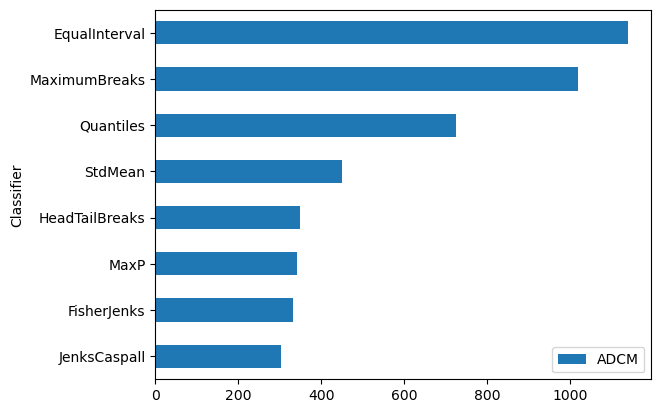

In [25]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')
plt.show()

In [29]:
# New levels for recoding
newlevels = {0:'1.very low', 1:'2.low', 2:'3.average', 3:'4.high', 4:'5.very high'}

# Assuming 'best_method' is the result from the previous step, which tells the best binning method for obesity
print(f"best binning method for obesity: {best_method['Classifier']}")

# Compare the best method for obesity with Fisher-Jenks (used for alcohol and tobacco)
if best_method['Classifier'] != 'FisherJenks':
    print("\nThe best method differs from Fisher-Jenks. I need to apply the new method to Alcohol and Tobacco.")
    
    # Apply the new binning method (using the best method found for obesity)
    best_Binner = eval(best_method['Classifier'])  # Get the best binning method dynamically
    
    # Re-bin alcohol column using the new method
    countriesCIA['alcohol_code'] = best_Binner.yb
    
    # Create a copy in another column for alcohol
    countriesCIA = countriesCIA.assign(alcohol_levels=countriesCIA.alcohol_code)
    
    # Recode alcohol levels
    countriesCIA.replace({'alcohol_levels': newlevels}, inplace=True)

    # Re-bin tobacco column using the new method (assuming tobacco binning is also based on the best method)
    countriesCIA['tobacco_code'] = best_Binner.yb  # Apply binning to tobacco as well (if needed)
    
    # Create a copy in another column for tobacco
    countriesCIA = countriesCIA.assign(tobacco_levels=countriesCIA.tobacco_code)
    
    # Recode tobacco levels
    countriesCIA.replace({'tobacco_levels': newlevels}, inplace=True)
    
    print("\nNew binned variables for alcohol and tobacco created using the best binning method.")
else:
    print("\nThe best method is the same as Fisher-Jenks. No need to apply new binning for Alcohol and Tobacco.")


countriesCIA.head()


best binning method for obesity: FisherJenks

The best method is the same as Fisher-Jenks. No need to apply new binning for Alcohol and Tobacco.


,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,geometry
0,Afghanistan,Afghanistan,South Asia,5.5,23.3,0.01,2,3.average,3.(15-30],0,1.very low,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
1,Algeria,Algeria,Africa,27.4,21.0,0.59,2,3.average,3.(15-30],0,1.very low,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
2,Azerbaijan,Azerbaijan,Middle East,19.9,24.0,1.38,2,3.average,3.(15-30],0,1.very low,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
3,Albania,Albania,Europe,21.7,22.4,4.40,2,3.average,3.(15-30],2,3.average,"MULTIPOLYGON (((20.79192 40.43154, 20.78722 40..."
4,Armenia,Armenia,Middle East,20.2,25.5,3.77,2,3.average,3.(15-30],1,2.low,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38..."


In [35]:
best_obesity = countriesCIA[countriesCIA['obesityAdults_rate'] == 0]  

best_alcohol = countriesCIA[countriesCIA['alcohol_levels'] == '1.very low']  
# Step 3: Find the best countries in tobacco (lowest value in tobacco_bins)
best_tobacco = countriesCIA[countriesCIA['tobacco_levels'] == '1.very low']  

best_countries = pd.merge(best_obesity, best_alcohol, how='inner', on='COUNTRY')  
best_countries = pd.merge(best_countries, best_tobacco, how='inner', on='COUNTRY')  #

# Display the best countries doing well in all three variables
print(countriesCIA[['COUNTRY', 'obesityAdults_rate', 'alcohol_levels', 'tobacco_levels']].head())  


       COUNTRY  obesityAdults_rate alcohol_levels tobacco_levels
0  Afghanistan                 5.5     1.very low      3.average
1      Algeria                27.4     1.very low      3.average
2   Azerbaijan                19.9     1.very low      3.average
3      Albania                21.7      3.average      3.average
4      Armenia                20.2          2.low      3.average
